# KNN – Machine Learning 

### Assigment 13 TC2011 Intelligent Systems
#### Constanza Madrigal Reyes A01226021
#### October 24, 2018

#### Constanza Madrigal Reyes A01226021 
#### October 24, 2018


KNN algorithm use to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.

In [4]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
#Load the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

As observed above we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label. 

In [7]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

Let's split the data randomly into training and test set. 

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

In [79]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of random size between 20% and 40% of about the dataset.

In [80]:
import random

rand_size = random.randrange(20, 40, 1)/100
print(rand_size)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=rand_size,random_state=42, stratify=y)

0.37


Let's observe the score for different values of k .

In [81]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import math

diff = 10
k_value = int(math.sqrt(len(df)))

#Setup arrays to store training and test accuracies
neighbors = np.arange(k_value-diff, k_value+diff)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

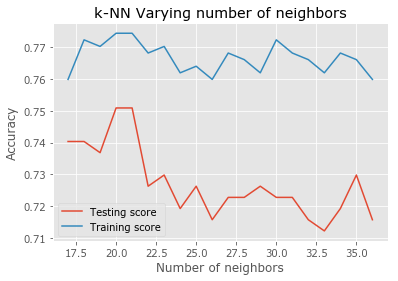

In [82]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing score')
plt.plot(neighbors, train_accuracy, label='Training score')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [83]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

results = [[],[],[],[]]
for i in range(k_value-diff, k_value+diff):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    #Fit the model
    knn.fit(X_train,y_train)
    #Get score. Note: In case of classification algorithms score method represents accuracy.
    knn.score(X_test,y_test)
    #let us get the predictions using the classifier we had fit above
    y_pred = knn.predict(X_test)
    result = confusion_matrix(y_test,y_pred)
    results[0].append(i)
    results[1].append(result[0][0])
    results[2].append(result[1][1])
    results[3].append(knn.score(X_test,y_test))

rf = pd.DataFrame(results)
rf = rf.transpose()
rf.columns = ['K', 'True negative', 'True positive','Score']
rf
    

,K,True negative,True positive,Score
0,17.0,163.0,48.0,0.740351
1,18.0,166.0,45.0,0.740351
2,19.0,161.0,49.0,0.736842
3,20.0,168.0,46.0,0.750877
4,21.0,166.0,48.0,0.750877
5,22.0,167.0,40.0,0.726316
6,23.0,164.0,44.0,0.729825
7,24.0,168.0,37.0,0.719298
8,25.0,164.0,43.0,0.726316
9,26.0,169.0,35.0,0.715789


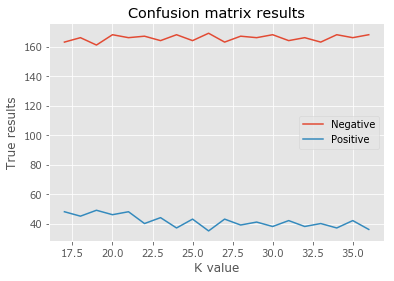

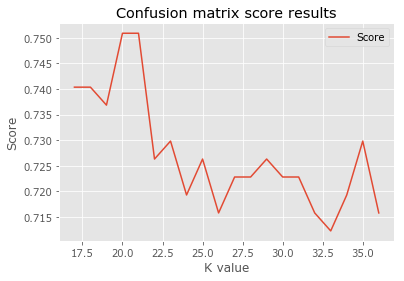

In [84]:
#Generate plot
plt.title('Confusion matrix results')
plt.plot(results[0], results[1], label='Negative')
plt.plot(results[0], results[2], label='Positive')
plt.legend()
plt.xlabel('K value')
plt.ylabel('True results')
plt.show()


plt.title('Confusion matrix score results')
plt.plot(results[0], results[3], label='Score')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()